<a href="https://colab.research.google.com/github/anuska14ghosh/california_housing_analysis/blob/main/CALIFORNIAhousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***California*** ***Housing***  

The dataset is primarily created around California to gauge the rise in prices of houses depending upon its Ocean Side Proximity. It contains a lot of additional relevant data:


*  Longitudinal Situation  
*  Latitudinal Situation
*  Housing Median
*  Total No. of Rooms
*  Total No. of Bedrooms
*  Households
*  Median Income of dwellers
*  Median House Value
*  Ocean Side Proximity

The dataset is prepared using the 1990 California Census Data and appeared in a 1997 paper titled Sparse Spatial Autoregressions

The dataset is available in a **CSV** file and is downloaded from **github** the link to which is attached below [https://github.com/ageron/handson-ml/tree/master/datasets/housing](https://)

We will analyze this data using **Pandas** **DataFrame**




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
df= pd.read_csv("/content/housing.csv")

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#DETECTING THE EMPTY VALUES
##To make sure there's no Null values we perform the following as in most cases the **isnull().sum()** function overlooks the Null value leading to error later
##Therefore to avoid facing such issues later we perform the following operation


In [5]:
#Creating a list of Missing values for Compiler to detect
missing_value= ["N/a", "na","np.nan"]
df= pd.read_csv("/content/housing.csv", na_values=missing_value)


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#**DATA CLEANING**

#REMOVING THE EMPTY VALUES
*Since we discovered that* ***Total Bedrooms*** has 207 missing values we now need to handel that  
*We can do so by removing the Empty Values or by removing the entire row that has empty values*

In [7]:
#removing the empty values
df.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#HANDLING THE EMPTY VALUES
**since in  DATA ANALYSIS removing data to handel missing or null values is not a feasible or suggested option leading to chances of non-accurate results, hence we can use**


*   FORWARD FILL METHOD
*   BACKWARD FILL METHOD

**Essesntially we are using only the FORWARD FILL METHOD here**



In [8]:
#Using the Forward fill method filling up missing values with its preceeding values
df.fillna(method='ffill')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
#We can perform the fill in operation using backward fill
#df.fillna(method="bfill")
#this would've replaced all values with its succeeding values

**Again we may use INTERPOLATION to make our missing data more and more accurat rather filling up with any random values**

**INTERPOLATION fills up the missing data with the average of its preceeding and succeeding values**

In [10]:
df.interpolate()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


**After Successfully cleaning up of the data using several methods like:**


1.   Removing empty values using **dropna()**
2.   Filling Null values with a 0 using **fillna(0)**


3.  Forward Fill Method using **fillna(method="ffill")**
4.   Backward Fill Method using **fillna(method="bfill")**
5.  Interpolation using the **interpolate()**







#Now proceeding with our ANALYSIS

In [11]:
import matplotlib.pyplot as plt


In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
#wanting to know the data type of our data variables
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

#**PRE-PROCESSING OUR DATASET**


In [14]:
#Converting Column Data Type with the data type of our choice
#we are converting "ocean_proximity" column which is initially "object" type to "boolean" type
df['ocean_proximity']= df['ocean_proximity'].astype('bool')


In [15]:
#Checking if data type is successfully converted
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,True
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,True
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,True
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,True
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,True
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,True
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,True
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,True
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,True


#REMOVING LATITUDE AND LONGITUDE COLUMNS

**since we feel the Latitude and Longitude are additional columns**

In [16]:
#Removing Longitude and Latitude Column
df.drop(['longitude','latitude'], axis=1, inplace=True)


In [17]:
#printing the modified dataset
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,True
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,True
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,True
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,True
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,True
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,True
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,True
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,True
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,True


#FINDING THE MAXIMUM OF THE MEDIAN INCOME OF THE PROPRIETOR AS PER THE OCEANSIDE PROXIMITY HOUSE IN CALIFORNIA

In [18]:
#finding the max of the median_income as per the ocean_proximity
df.groupby('ocean_proximity').median_income.max()
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,True
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,True
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,True
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,True
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,True
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,True
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,True
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,True
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,True


#**DATA VISUALIZATION**

In [19]:
#The color code needs to be equal to true to represent the data in order to make the data visually attractive
sns.set(color_codes= True)

#**UNIVARIATE DISTRIBUTION**

**Showing variation in House prices with variation in its usage time period**

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

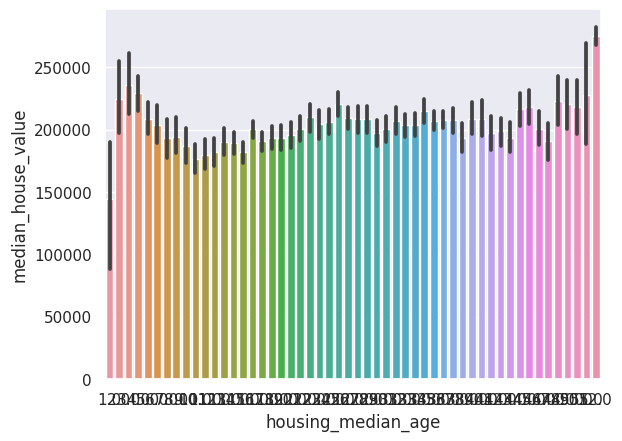

In [20]:
#plotting graph to show the variation in house values with the variation in the house age
sns.barplot(x= df.housing_median_age, y= df.median_house_value)

**Graph showing the variation in House Pricing in California**

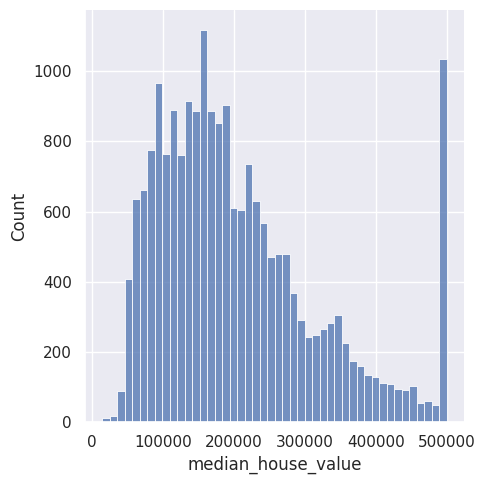

In [21]:
#creating a displot to show the Median House Values
#DISPLOT: used for continous data representation
sns.displot(df['median_house_value'])

#**BIVARIATE DISTRIBUTION**

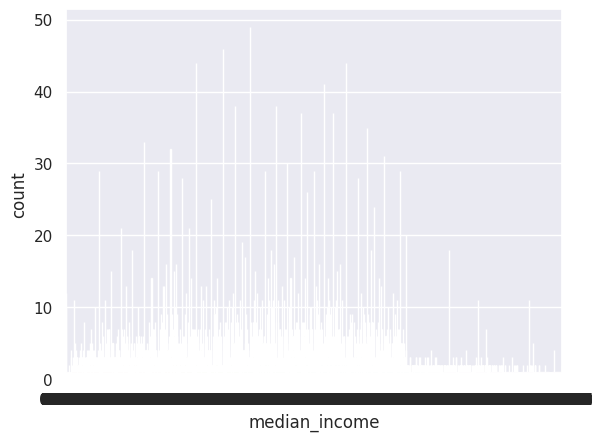

In [22]:
#plotting gaph to show the changes house pricing with increase and decrease house proximity to Ocean Side

sns.countplot(data= df , x= 'median_income')
plt.show()

##**Showing Variation in Housing Prices with variation in Ocean Vicinity**

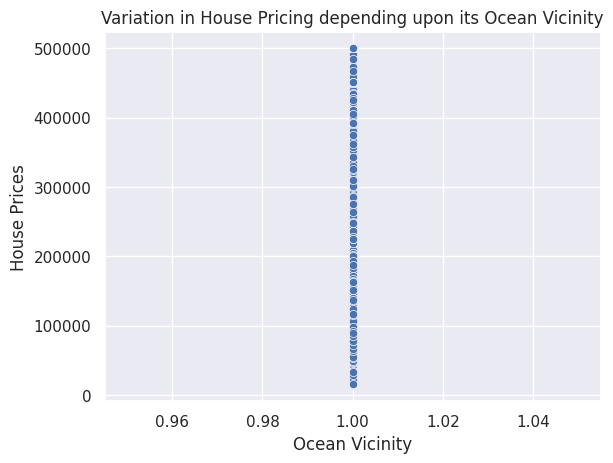

In [23]:
# Creating a count plot
sns.scatterplot(x='ocean_proximity',y= 'median_house_value' ,data=df)

# Assigning labels and title
plt.xlabel('Ocean Vicinity')
plt.ylabel('House Prices')
plt.title('Variation in House Pricing depending upon its Ocean Vicinity')

# Show the plot
plt.show()

# ***Preparing a Report on California Housing Data Analysis***

**ydata-profiling is a leading package for data profiling, that automates and standardizes the generation of detailed reports, with statistics and visualization**

In [24]:
#installing ydata-profiling
!pip install ydata-profiling

In [25]:
!pip install typing_extensions

In [26]:
!pip install -U pandas-profiling

In [27]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [1]:
from ydata_profiling import ProfileReport

**ProfileReport() function is a method of ydataprofiling initially known as Pandas Profiling that generates report on data frame consisting of following information:**

1. Data Frame overview
2. Correlation between attributes

In [4]:
#importing required libraries
import numpy as np
import pandas as pd

In [5]:
#loading the data set into our data frame named'df'
df= pd.read_csv("/content/housing.csv")

In [6]:
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [7]:
#Generating a Report
profile= ProfileReport(df)
#converting the report to a file of our choice i.e., html
profile.to_file(output_file= 'housing.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]